In [1]:
import json
import torch
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from torchvision.ops.boxes import box_iou

In [2]:
class PRCurveDrawer:
    def __init__(self,
        data_file: str=r'//aka/work/hara.e/AMED/lib/dataset/annotations/test.json',
        preds_file: str=r'//aka/work/hara.e/AMED/YOLOX/sample.json',
        th='reliability'
    ):

        with open(preds_file) as f:
            self.preds = json.load(f)
        with open(data_file) as f:
            self.data = json.load(f)['annotations']
        self.ths = self._get_reliability() if th == 'reliability' else self._get_ious()
        
    def draw(self, th: list=[0.5]):
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        for t in th:
            self.precision, self.recall = self._get_pr(t)
            plt.plot(self.recall, self.precision)
        print(th)
        plt.legend(th)
        plt.xlabel('Recall')
        plt.ylabel('Precision')

    def _get_pr(self, th):
        gt = sum([1 for t in self.ths if t > th])
        precision, recall = [], []
        t = 0
        for i, iou in enumerate(self.ths):
            if th < iou:
                t += 1
            precision += [t / (i + 1)]
            recall += [t / gt]
        return precision, recall
    
    def _get_reliability(self):
        return self.preds['reliability']
            
    def _get_ious(self):
        ious = []
        for i, pred in enumerate(self.preds['annotations']):
            iou = calc_iou(self.preds['annotations'][i], self.data[i]['bbox'])
            ious += [iou.item()]
        return ious
        
    def _calc_iou(self):
        x, y, w, h = self.label
        if pred is not None:
            iou = box_iou(torch.Tensor(self.pred['bbox']), torch.Tensor([[x, y, x + w, y + h]]))
        else:
            iou = torch.Tensor([[0.]])
        return torch.max(iou)

[0.7, 0.8, 0.9]


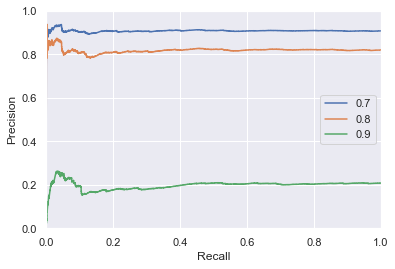

In [3]:
drawer = PRCurveDrawer()
drawer.draw([0.7, 0.8, 0.9])